In [32]:
#Zad1

import numpy as np
import matplotlib.pyplot as plt

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

np.random.seed(242)
data = generate_data(200)

np.random.seed(12)
train = generate_data(100)

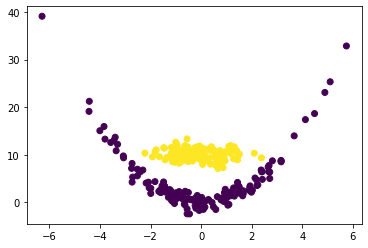

In [33]:
#Zad2
x1 = data[:,0]
x2 = data[:,1]
klase = data[:,2]

plt.figure(1)
plt.scatter(x1, x2, c=klase)

t1 = train[:,0]
t2 = train[:,1]
klaseT = train[:,2]

plt.scatter(t1, t2, c=klaseT)

Text(0, 0.5, 'x2')

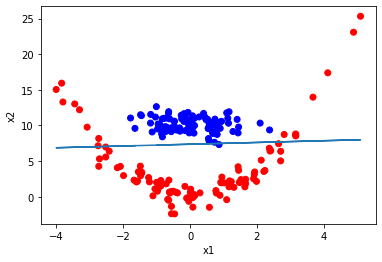

In [20]:
#Zad3

from sklearn.linear_model import LogisticRegression

x_train = data[:, :-1]
y_train = data[:, -1]

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

param = list(classifier.coef_[0])
param.append(classifier.intercept_[0])

colors = ["red" if l == 0 else "blue" for l in y_train]
plt.scatter(x_train[:, 0], x_train[:, 1] , c = colors)

x1 = [x1 for x1 in x_train[:, 0]]
x2 = [- param[2] / param[1] - param[0] * x1 / param[1] for x1 in x_train[:, 0]]
plt.plot(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")

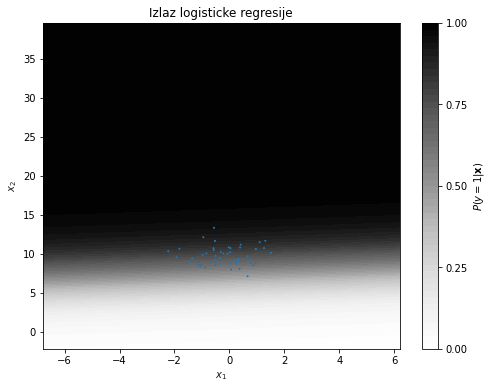

In [46]:
 #Zad4

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train[:,0])-0.5:max(train[:,0])+0.5:.05,
                          min(train[:,1])-0.5:max(train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
ax.autoscale(False)
plt.scatter(t1, t2, klaseT)
plt.show()

Text(0, 0.5, 'x2')

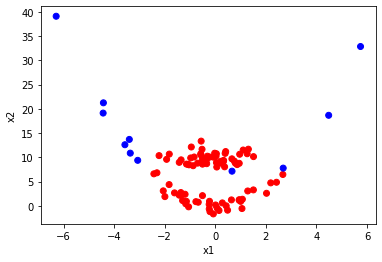

In [47]:
#5. zadatak
X_test = train[:, :-1]
y_test = train[:, -1]

y_pred = classifier.predict(X_test)
colors_test = ["red" if yp == yt else "blue" for yp, yt in zip(y_pred, y_test)]
plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test)
plt.xlabel("x1")
plt.ylabel("x2")

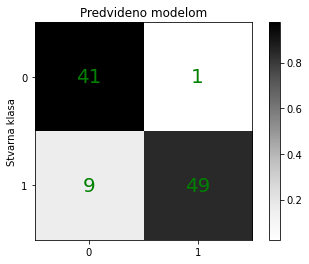

0.9
0.8448275862068966
0.98
0.09999999999999998
0.98


In [45]:
#Zad6

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


cm = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(acc)
prec = precision_score(y_test, y_pred)
print(prec)
rec = recall_score(y_test, y_pred)
print(rec)
miss = 1 - acc
print(miss)
spec = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print(spec)